Once the nodes are generated, there is two main stages for computing the quadrature matrix and weights associated to those nodes :

1. Compute the barycentric weights for the Lagrange polynomials
2. Integrate the Lagrange polynomials on given intervals

The original ('ORIG') algorithm in pySDC is based on :

1. BarycentricInterpolator from scipy.interpolate
2. quad function from scipy.integrate, with absolute tolerance of `1e-14`


The new "optimized" implementation ('NEW'), added in the master branche a few months ago, uses those stages :

1. Modified BarycentricInterpolator from scipy.interpolate, computing the weights with log and exp (instead of product and inverse)
2. Legendre quadrature from numpy, using `(n+1)//2` nodes

There is now three possible future approaches, based on a custom LagrangeApproximation object that computes the barycentric weights (optimized product and inverse), with three different quadratures rules :

1. Fejer quadrature rule, with `n-((n+1)%2)` nodes ('FEJER')
2. Legendre quadrature from numpy, with `(n+1)//2` nodes ('LEGENDRE_NUMPY')
3. Legendre quadrature from scipy, with `(n+1)//2` nodes ('LEGENDRE_SCIPY')

The whole testing procedure for those algorithms is implemented in the adjoint ``quadrature.py`` file

In [1]:
import quadrature as quad

Below we set the number of random test :

- nInterTest : number of randomly generated interval close to ``[0, 1]``, on which the quadrature matrix and weights are generated
- nPolyTest : number of randomly generated polynomials on which the quadrature matrix and weights error are evaluated

In [2]:
quad.nPolyTest = 500
quad.nInterTest = 100

Note for each configuration, the same starting random seed is used. 

Below, for a given node distribution and implementation, all experiments are performed, and results are shown with the all-in-one `plotQuadErrors` function: it plots the quadrature error in function of the degree, for the weights (left) and the quadrature matrix (middle), considering all quadrature type ('LOBATTO', 'RADAU-LEFT', 'RADAU-RIGHT', 'GAUSS'). 

- plain line : mean error value for all experiments
- dotted line : maximum error value over all experiments

Additionnaly, we plot the computation time required for generating the weights and quadrature matrix (right), looking at the mean for all experiments.

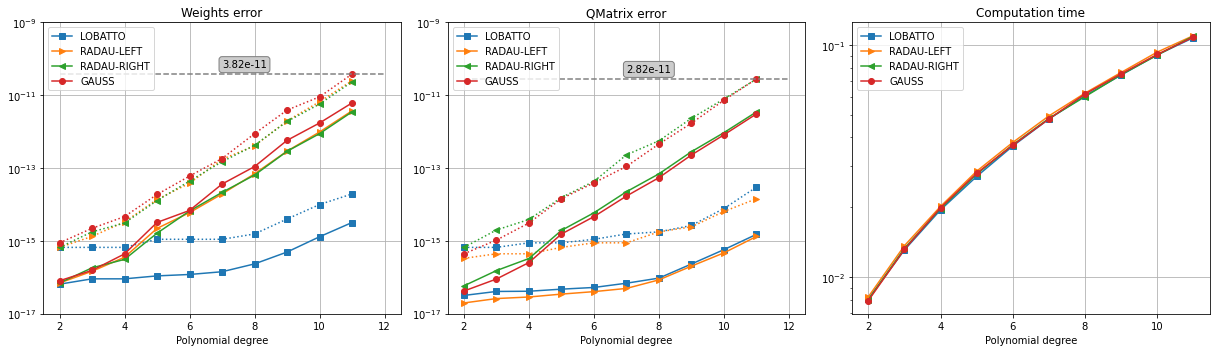

In [3]:
quad.plotQuadErrors('EQUID', 'ORIG')

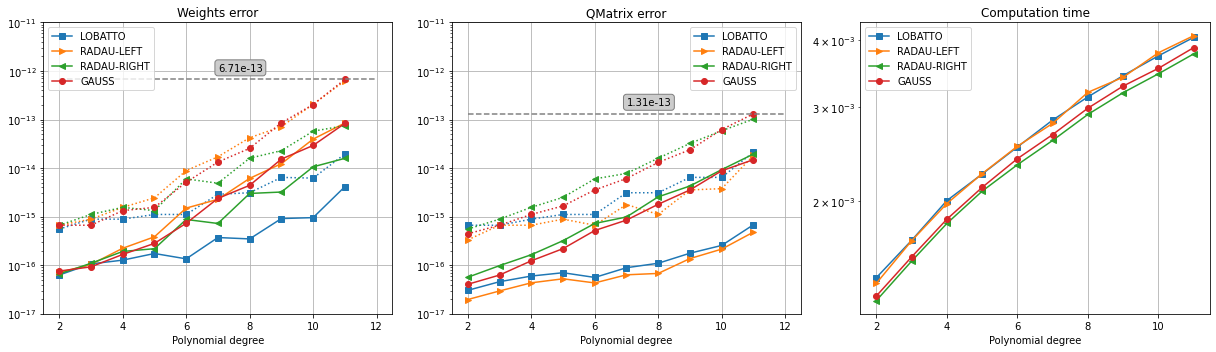

In [4]:
quad.plotQuadErrors('EQUID', 'NEW')

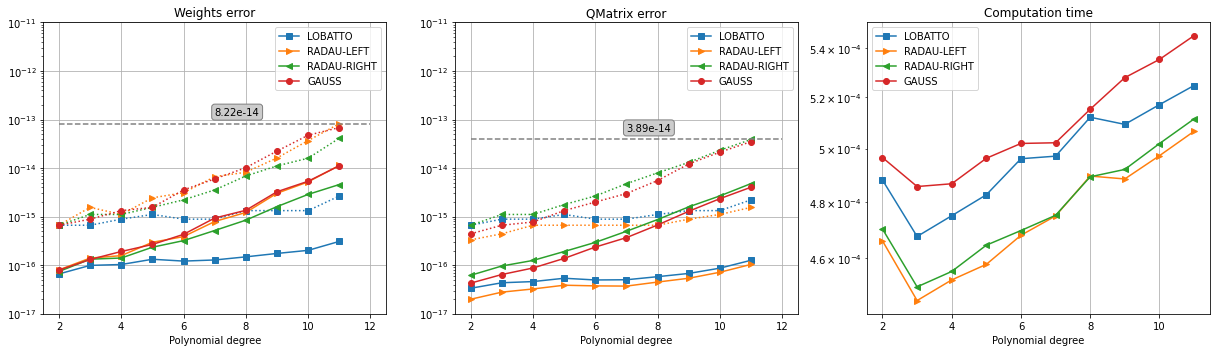

In [5]:
quad.plotQuadErrors('EQUID', 'FEJER')

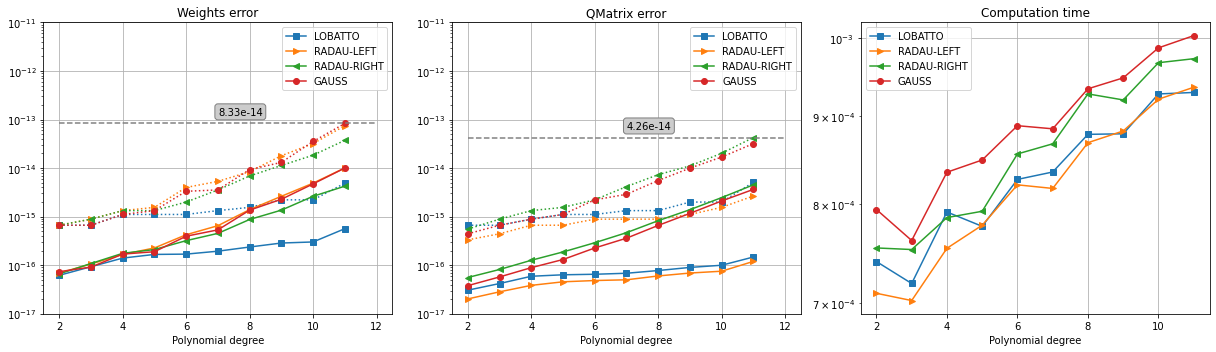

In [6]:
quad.plotQuadErrors('EQUID', 'LEGENDRE_NUMPY')

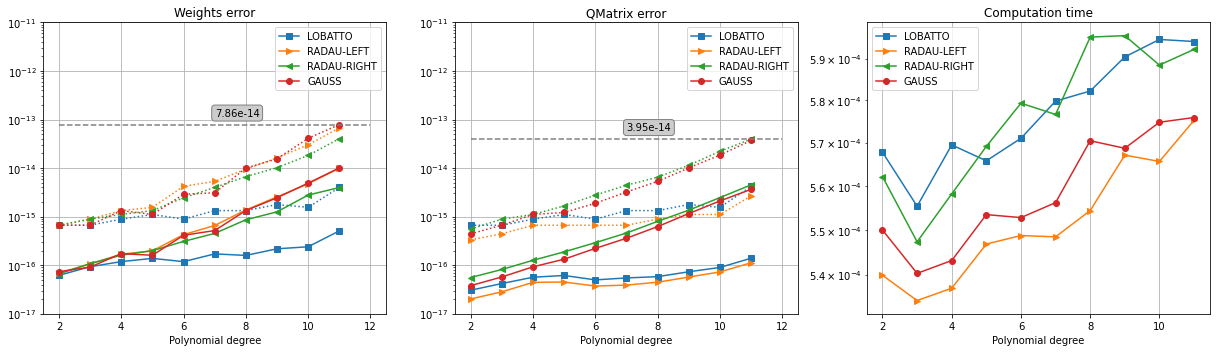

In [7]:
quad.plotQuadErrors('EQUID', 'LEGENDRE_SCIPY')

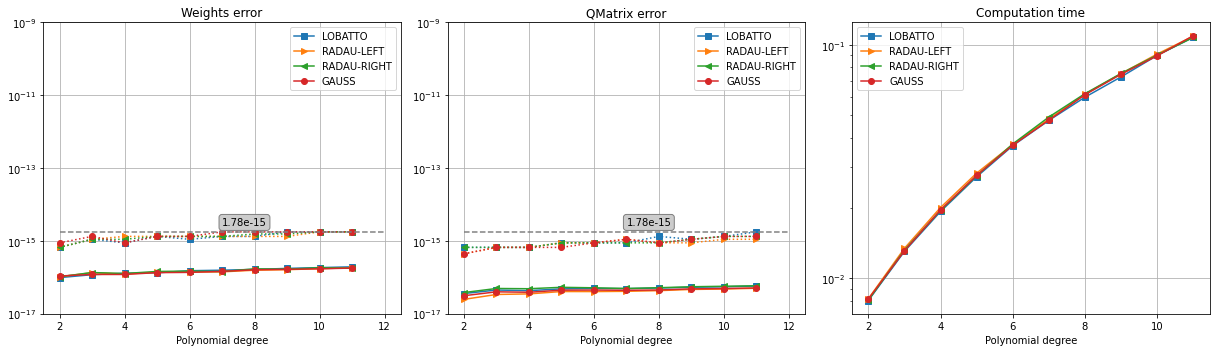

In [8]:
quad.plotQuadErrors('LEGENDRE', 'ORIG')

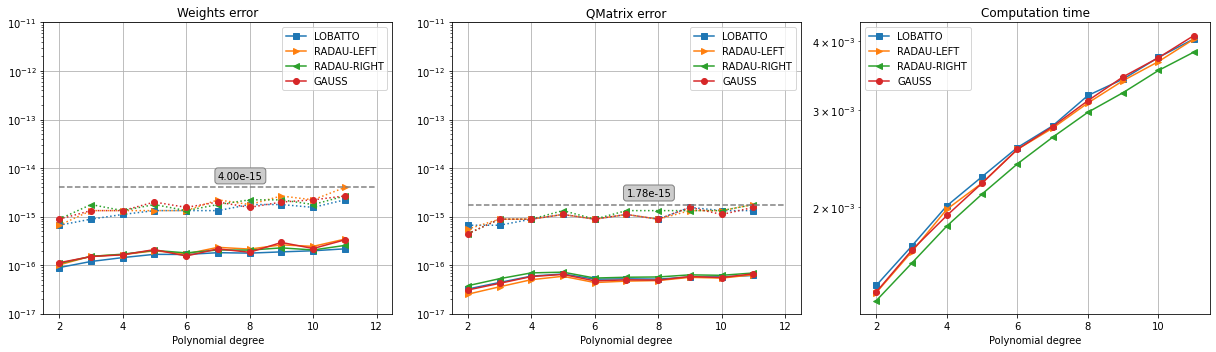

In [9]:
quad.plotQuadErrors('LEGENDRE', 'NEW')

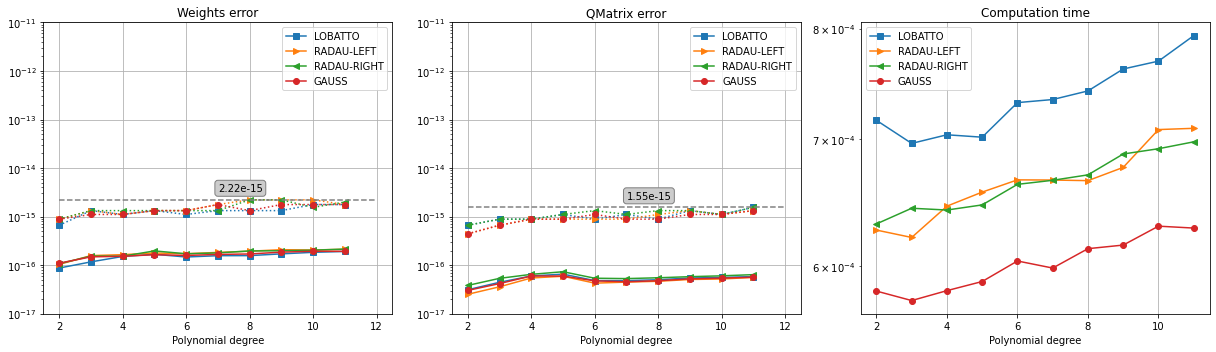

In [10]:
quad.plotQuadErrors('LEGENDRE', 'LEGENDRE_SCIPY')

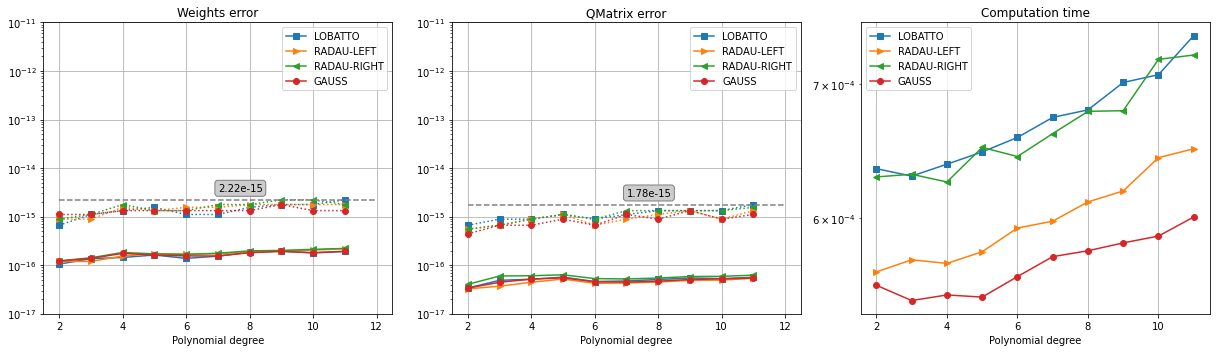

In [11]:
quad.plotQuadErrors('LEGENDRE', 'FEJER')

Finally, a particular aspect that has not been investigated yet : there is three approaches when computing the barycentric weights for the Lagrange interpolant polynomials. To recall the theory, the analytic formula for the barycentric weights is :

$$ w_i = \frac{1}{\prod_{ k\neq j}(x_j-x_k)}, $$

with $x_j$ the nodes. Then, the Lagrange interpolant polynomial is evaluated using

$$ p(x) = \frac{\sum_{j=1}^{n} \frac{w_j}{x-x_j}f_j }{\sum_{j=1}^{n}\frac{w_j}{x-x_j}},$$

with $f_j$ the value of the interpolated function at the nodes.
Note that using this formula allows any scaling factor to be applied to the barycentric weights.
Now the three computationnal approaches are : 

1. Use the analytical formula (product and inverse) : this is the fastest way, even if this becomes unstable for large number of nodes because the $x_j-x_k$ can become very small. The BarycentricInterpolator of scipy.interpolate combines this approach with random permutation of the $x_j-x_k$, while the custom implemented LagrangeApproximation object provides a vectorized version of it ('FAST').

2. Scale each difference by the interval size, compute the product with exp and log functions, and invert it. This approach is used in the chebfun Matlab package, and also provided by the LagrangeApproximation class ('CHEBFUN')

3. Compute the inverse of the product of the differences with log function, then scale with the maximum weight value, and get back the weights with the exp function. This is provided by the LagrangeApproximation class ('STABLE'), and also used by the modified BarycentricInterpolator for the 'NEW' collocation implementation.

By default, all result presented before ('FEJER', 'LEGENDRE_NUMPY' and 'LEGENDRE_SCIPY') used the 'FAST' approach. Now we change it and look at the quadrature errors :

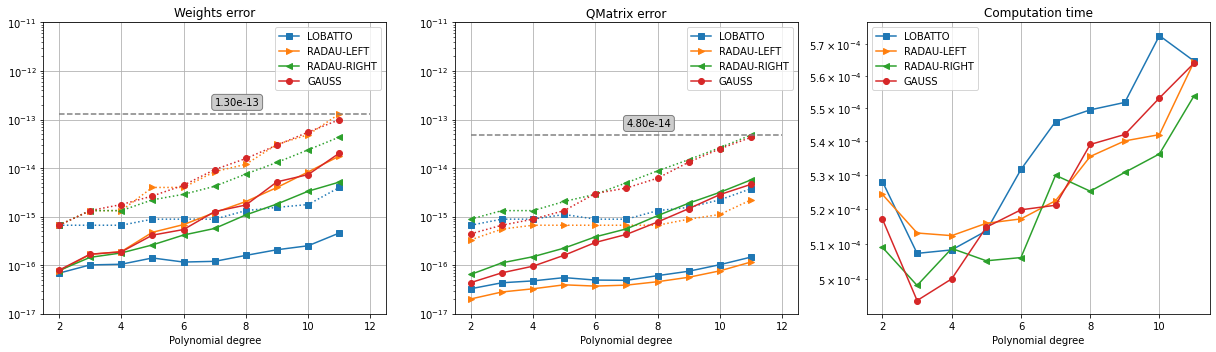

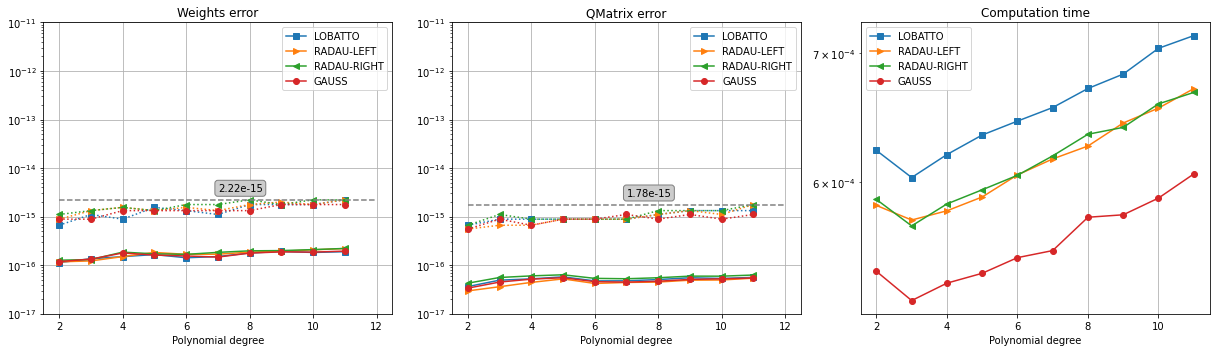

In [12]:
quad.baryWeightComputation = 'CHEBFUN'
quad.plotQuadErrors('EQUID', 'FEJER')
quad.plotQuadErrors('LEGENDRE', 'FEJER')

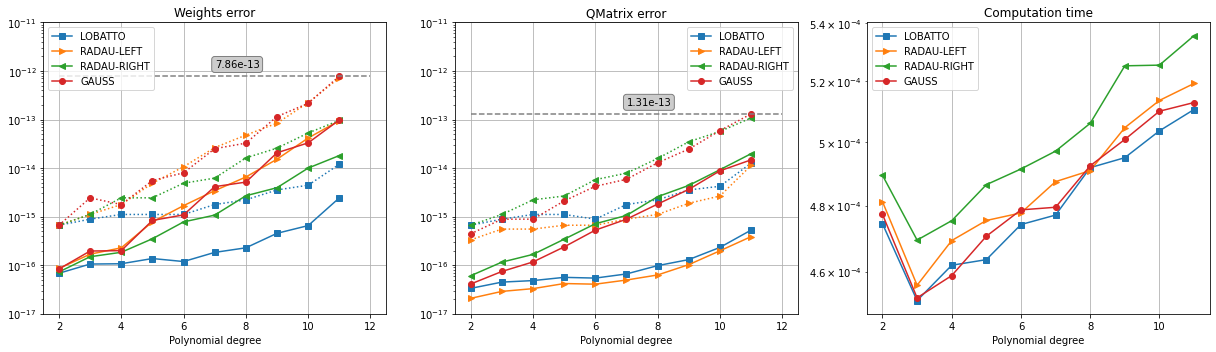

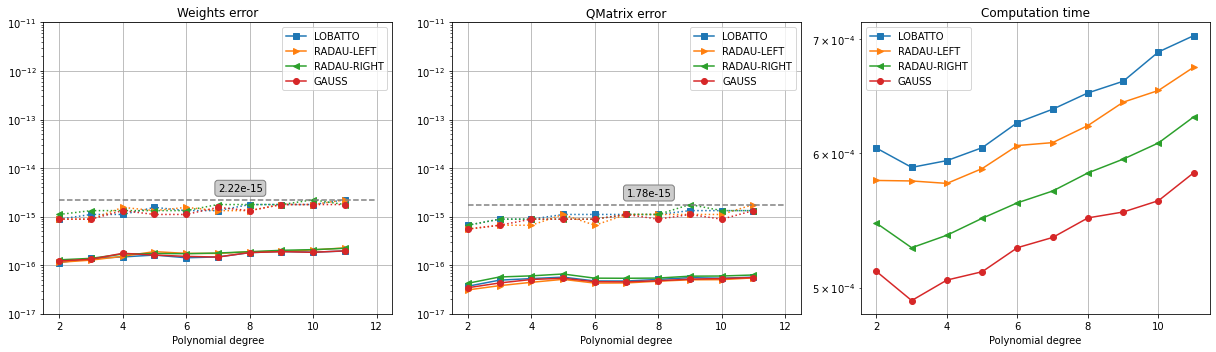

In [13]:
quad.baryWeightComputation = 'STABLE'
quad.plotQuadErrors('EQUID', 'FEJER')
quad.plotQuadErrors('LEGENDRE', 'FEJER')